In [1]:
import spacy
import pandas as pd
import numpy as np
from collections import Counter
from glob import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

from sent2tree import sentenceTree
import ete3 
import seaborn

# Display plots in this notebook, instead of externally. 
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
%matplotlib inline

In [2]:
spacy.info()


    Info about spaCy

    spaCy version      2.0.3          
    Location           /Users/melvinwevers/anaconda3/envs/py3/lib/python3.6/site-packages/spacy
    Platform           Darwin-17.2.0-x86_64-i386-64bit
    Python version     3.6.3          
    Models             en_core_web_lg 



In [3]:
nlp = spacy.load('en_core_web_lg')

In [4]:
grail_raw = open('grail.txt').read()
pride_raw = open('pride.txt').read()

In [5]:
# Parse the texts. These commands might take a little while. 
grail = nlp(grail_raw)
pride = nlp(pride_raw)

In [6]:
pride[:10]

﻿It is a truth universally acknowledged, that a single

In [8]:
next(pride.sents)

﻿It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.


In [10]:
prideSents = list(pride.sents)
prideSents[-1]

Darcy, as well as Elizabeth, really loved them; and they were both ever
sensible of the warmest gratitude towards the persons who, by bringing
her into Derbyshire, had been the means of uniting them.

In [11]:
list(grail.sents)[-1]

[crash] 
CAMERAMAN: Christ!

In [12]:
prideSentenceLengths = [len(sent) for sent in prideSents]
sent = [sent for sent in prideSents if len(sent) == max(prideSentenceLengths)]
sent[0]

Every lingering struggle in his favour grew fainter
and fainter; and in farther justification of Mr. Darcy, she could not
but allow that Mr. Bingley, when questioned by Jane, had long ago
asserted his blamelessness in the affair; that proud and repulsive as
were his manners, she had never, in the whole course of their
acquaintance--an acquaintance which had latterly brought them much
together, and given her a sort of intimacy with his ways--seen anything
that betrayed him to be unprincipled or unjust--anything that spoke him
of irreligious or immoral habits; that among his own connections he was
esteemed and valued--that even Wickham had allowed him merit as a
brother, and that she had often heard him speak so affectionately of his
sister as to prove him capable of _some_ amiable feeling; that had his
actions been what Mr. Wickham represented them, so gross a violation of
everything right could hardly have been concealed from the world; and
that friendship between a person capable of i

In [16]:
##exploring words

pride[4].text


'universally'

In [15]:
pride[4]

universally

In [17]:
[prop for prop in dir(pride[4]) if not prop.startswith('_')]

['ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'like_num',
 'like_url',
 'lower',
 'lower_',
 'n_lefts',
 'n_rights',
 'nbor',
 'norm',
 'norm_',
 'orth',
 'orth_',
 'pos',
 'pos_',
 'prefix',
 'prefix_',
 'prob',
 'rank',
 'right_edge',
 'rights',
 'sent_start',
 'sentiment',
 'set_extension',
 'shape',
 'shape_',
 'similarity',
 'string',
 'subtree',
 'suffix',
 'suffix_',
 'tag',
 'tag_',
 'text',
 'text_with_ws',
 'vector',
 'vector_norm',
 'vocab',
 'whitespace_']

In [18]:
pride[4].i

4

In [19]:
def locations(needle, haystack): 
    """ 
    Make a list of locations, bin those into a histogram, 
    and finally put it into a Pandas Series object so that we
    can later make it into a DataFrame. 
    """
    return pd.Series(np.histogram(
        [word.i for word in haystack 
         if word.text.lower() == needle], bins=50)[0])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c7792e8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11c7a8438>], dtype=object)

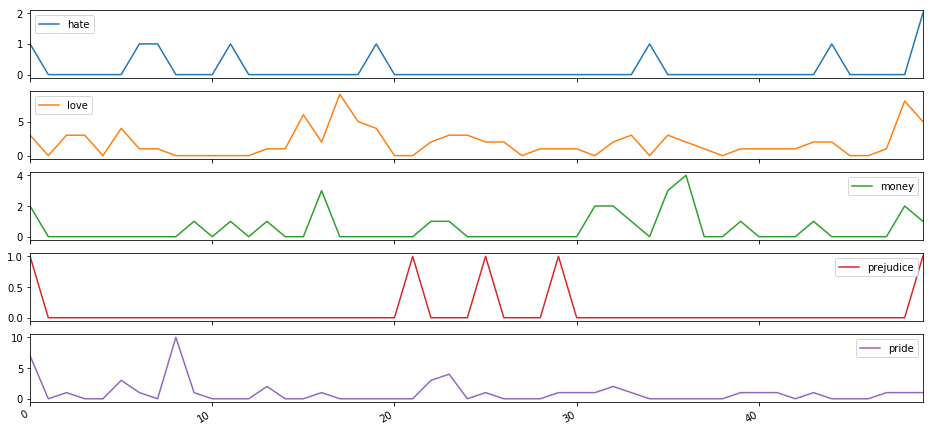

In [20]:
# I have no idea why I have to keep running this. 
rcParams['figure.figsize'] = 16, 8

pd.DataFrame(
    {name: locations(name.lower(), pride) 
     for name in ['pride', 'prejudice', 'love', 'hate', 'money']}
).plot(subplots=True)

In [21]:
## NER

set([w.label_ for w in grail.ents])

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [22]:
[ent for ent in grail.ents if ent.label_ == 'WORK_OF_ART']

[Man', Thy mer--
 BLACK KNIGHT, The Tale of Sir, Farewell, SHRUBBER, Til, The Holy Hand Grenade, the Book of Armaments, Camaaaaaargue, Black Beast, Black Beast, Black Beast, the Gorge of Eternal Peril]

In [29]:
[ent for ent in grail.ents if ent.label_ == 'GPE']

[England,
 Mercea,
 Mercea,
 Providence,
 Hiyaah,
 Yeaaah,
 Yeaah,
 Bristol,
 England,
 I.  ,
 Zoot,
 Dingo,
 Zoot,
 Castle Anthrax,
 Neee,
 Thsss,
 Britain,
 Hiyya,
 Hiyya,
 Hiyah,
 Hiyya,
 Hoa,
 Antioch,
 Antioch,
 France,
 Saint Aauuuves,
 Cornwall,
 Assyria]

In [24]:
set(list([ent.string.strip() for ent in grail.ents if ent.label_ == 'ORG']))

{'',
 'ARTHUR',
 'ARTHUR:',
 "Aauuuuugh'",
 'Arimathea',
 'Ayy',
 'BEDEVERE',
 'BLACK KNIGHT',
 'CART',
 'CARTOON',
 'CONCORDE',
 'Camelot',
 'Chicken',
 'Excalibur',
 'FRENCH',
 'Guy de Loimbard',
 'Holy Grail',
 'Iiiiives',
 'KNIGHTS',
 'Knights',
 'Knights of Ni',
 'Knights of the Round Table',
 'LAUNCELOT',
 'N--',
 'PATSY',
 'Pure',
 'Quoi',
 "That's--",
 'Un',
 'VILLAGER',
 'WITCH',
 'n--',
 "the BLACK KNIGHT's",
 'the Court of Camelot',
 'the Holy Grail',
 'the Holy Hand Grenade',
 'the Holy Pin'}

In [30]:
set([ent.string for ent in grail.ents if ent.label_ == 'NORP'])

{'Aaaugh',
 'African ',
 'Anarcho',
 'Britons',
 'English ',
 'European ',
 'FRENCH ',
 'French',
 'French ',
 'Saxons'}

In [31]:
frenchPeople = [ent for ent in grail.ents if ent.label_ == 'NORP' and ent.string.strip() == 'French']
[ent.sent for ent in frenchPeople]

[I'm French!  ,
 Well, now, uh, Launcelot, Galahad, and I, uh, wait until nightfall, and then leap out of the rabbit, taking the French, uh, by surprise.  ,
 The ferocity of the French taunting took him completely by surprise, and Arthur became convinced that a new strategy was required if the quest for the Holy Grail were to be brought to a successful conclusion.  ,
 So, we French fellows outwit you a second time!,
 So, you think you could out-clever us French folk with your silly knees-bent running about advancing behaviour?!  ,
 [exciting music] [music stops] [silence] French persons!
 FRENCH GUARDS: [taunting] ...]

In [32]:
#POS
# Make a quick-and-dirty lookup table of POS IDs, 
# since the default representation of a POS is numeric. 
tagDict = {w.pos: w.pos_ for w in pride} 
tagDict

{83: 'ADJ',
 84: 'ADP',
 85: 'ADV',
 88: 'CCONJ',
 89: 'DET',
 90: 'INTJ',
 91: 'NOUN',
 92: 'NUM',
 93: 'PART',
 94: 'PRON',
 95: 'PROPN',
 96: 'PUNCT',
 98: 'SYM',
 99: 'VERB',
 100: 'X',
 102: 'SPACE'}

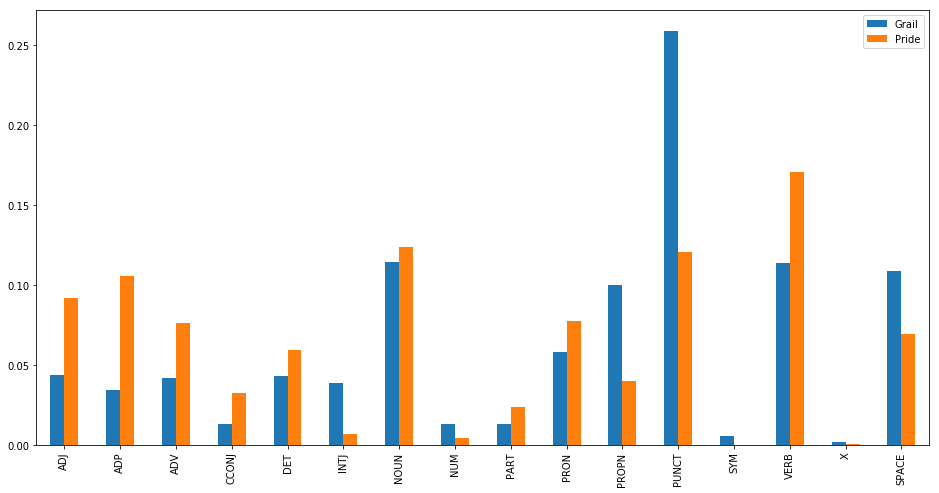

In [33]:
grailPOS = pd.Series(grail.count_by(spacy.attrs.POS))/len(grail)
pridePOS = pd.Series(pride.count_by(spacy.attrs.POS))/len(pride)

rcParams['figure.figsize'] = 16, 8
df = pd.DataFrame([grailPOS, pridePOS], index=['Grail', 'Pride'])
df.columns = [tagDict[column] for column in df.columns]
df.T.plot(kind='bar')

In [35]:
prideAdjs = [w for w in pride if w.pos_ == 'PRON']
Counter([w.string.strip() for w in prideAdjs]).most_common(10)

[('I', 2066),
 ('she', 1384),
 ('it', 1287),
 ('you', 1145),
 ('he', 1100),
 ('him', 762),
 ('her', 725),
 ('they', 477),
 ('me', 444),
 ('them', 433)]

In [36]:
grailAdjs = [w for w in grail if w.pos_ == 'PRON']
Counter([w.string.strip() for w in grailAdjs]).most_common(10)

[('I', 240),
 ('you', 202),
 ('it', 106),
 ('You', 61),
 ('We', 60),
 ('we', 57),
 ('me', 46),
 ('He', 46),
 ('he', 42),
 ('It', 35)]

In [37]:
robinSents = [sent for sent in grail.sents if 'Sir Robin' in sent.string]
robinSents

[The wise Sir Bedevere was the first to join King Arthur's knights, but other illustrious names were soon to follow: Sir Lancelot the Brave; Sir Gallahad the Pure; and Sir Robin the-not-quite-so-brave-as-Sir-Lancelot, who had nearly fought the Dragon of Angnor, who had nearly stood up to the vicious Chicken of Bristol, and who had personally wet himself at the Battle of Badon Hill; and the aptly named Sir Not-appearing-in-this-film.  ,
 The Tale of Sir Robin.  ,
 Sir Robin rode north, through the dark forest of Ewing, accompanied by his favorite minstrels.,
 Bravely bold Sir Robin, rode forth from Camelot.  ,
 He was not afraid to die, O brave Sir Robin.  ,
 Brave, brave, brave, brave Sir Robin!  ,
 To have his kneecaps split, and his body burned away, And his limbs all hacked and mangled, brave Sir Robin!,
 He is brave Sir Robin, brave Sir Robin, who--
 ROBIN:,
 Brave Sir Robin ran away.,
 Yes, brave Sir Robin turned about
 ROBIN: I didn't!,
 Bravest of the brave, Sir Robin.,
 My lieg

In [38]:
r2 = robinSents[2]
r2

Sir Robin rode north, through the dark forest of Ewing, accompanied by his favorite minstrels.

In [39]:
for word in r2: 
    print(word, word.tag_, word.pos_)

Sir NNP PROPN
Robin NNP PROPN
rode VBD VERB
north RB ADV
, , PUNCT
through IN ADP
the DT DET
dark JJ ADJ
forest NN NOUN
of IN ADP
Ewing NNP PROPN
, , PUNCT
accompanied VBN VERB
by IN ADP
his PRP$ ADJ
favorite JJ ADJ
minstrels NNS NOUN
. . PUNCT

  SPACE


In [40]:
##Dependency Parsing
[prop for prop in dir(r2) if not prop.startswith('_')]

['as_doc',
 'doc',
 'end',
 'end_char',
 'ent_id',
 'ent_id_',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'label',
 'label_',
 'lefts',
 'lemma_',
 'lower_',
 'merge',
 'n_lefts',
 'n_rights',
 'noun_chunks',
 'orth_',
 'rights',
 'root',
 'sent',
 'sentiment',
 'set_extension',
 'similarity',
 'start',
 'start_char',
 'string',
 'subtree',
 'text',
 'text_with_ws',
 'to_array',
 'upper_',
 'vector',
 'vector_norm']

In [41]:
r2.root

rode

In [42]:
list(r2.root.children)

[Robin, north, ,, through, ,, accompanied, .]

In [43]:
for word in r2: 
    print(word, ': ', str(list(word.children)))

Sir :  []
Robin :  [Sir]
rode :  [Robin, north, ,, through, ,, accompanied, .]
north :  []
, :  []
through :  [forest]
the :  []
dark :  []
forest :  [the, dark, of]
of :  [Ewing]
Ewing :  []
, :  []
accompanied :  [by]
by :  [minstrels]
his :  []
favorite :  []
minstrels :  [his, favorite]
. :  [
]

 :  []


You can already see how useful this might be. Since adjectives are typically children of the things they describe, we can get approximations for adjectives that describe characters. How is Sir Robin described?



In [49]:
for sent in robinSents: 
    for word in sent: 
        if 'Robin' in word.string: 
            for child in word.children: 
                if child.pos_ == 'ADJ':
                    print(child)

brave
brave
brave
brave
brave


In [50]:
#most frequent characters in pride
Counter([w.string.strip() for w in pride.ents if w.label_ == 'PERSON']).most_common(10)

[('', 2811),
 ('Elizabeth', 616),
 ('Darcy', 406),
 ('Bennet', 305),
 ('Jane', 288),
 ('Bingley', 237),
 ('Wickham', 182),
 ('Collins', 179),
 ('Lydia', 164),
 ('Lizzy', 95)]

In [51]:
def adjectivesDescribingCharacters(text, character):
    sents = [sent for sent in pride.sents if character in sent.string]
    adjectives = []
    for sent in sents: 
        for word in sent: 
            if character in word.string:
                for child in word.children: 
                    if child.pos_ == 'ADJ': 
                        adjectives.append(child.string.strip())
    return Counter(adjectives).most_common(10)

In [56]:
adjectivesDescribingCharacters(pride, 'Darcy')

[('“', 6),
 ('late', 6),
 ('superior', 1),
 ('abominable', 1),
 ('poor', 1),
 ('intelligible', 1),
 ('her', 1),
 ('little', 1),
 ('disagreeable', 1)]

In [57]:
elizabethSentences = [sent for sent in pride.sents if 'Elizabeth' in sent.string]

In [58]:
elizabethSentences[3]

Mr. Darcy walked off; and Elizabeth
remained with no very cordial feelings toward him.

We want the verb associated with Elizabeth, remained, not the root verb of the sentence, walked, which is associated with Mr. Darcy. So let's write a function that will walk up the dependency tree from a character's name until we get to the first verb. We'll use lemmas instead of the conjugated forms to collapse remain, remains, and remained into one verb: remain.

In [59]:
def verbsForCharacters(text, character):
    sents = [sent for sent in pride.sents if character in sent.string]
    charWords = []
    for sent in sents: 
        for word in sent: 
            if character in word.string: 
                charWords.append(word)
    charAdjectives = []
    for word in charWords: 
        # Start walking up the list of ancestors 
        # Until we get to the first verb. 
        for ancestor in word.ancestors: 
            if ancestor.pos_.startswith('V'): 
                charAdjectives.append(ancestor.lemma_.strip())
    return Counter(charAdjectives).most_common(20)

In [60]:
elizabethVerbs = verbsForCharacters(pride, 'Elizabeth')
elizabethVerbs

[('be', 173),
 ('say', 65),
 ('have', 32),
 ('cry', 24),
 ('reply', 22),
 ('see', 22),
 ('feel', 21),
 ('make', 18),
 ('look', 16),
 ('receive', 12),
 ('find', 11),
 ('go', 10),
 ('give', 10),
 ('begin', 9),
 ('take', 9),
 ('help', 9),
 ('listen', 8),
 ('think', 8),
 ('pass', 8),
 ('walk', 7)]

In [63]:
darcyVerbs = verbsForCharacters(pride, 'Darcy')
janeVerbs = verbsForCharacters(pride, 'Jane')


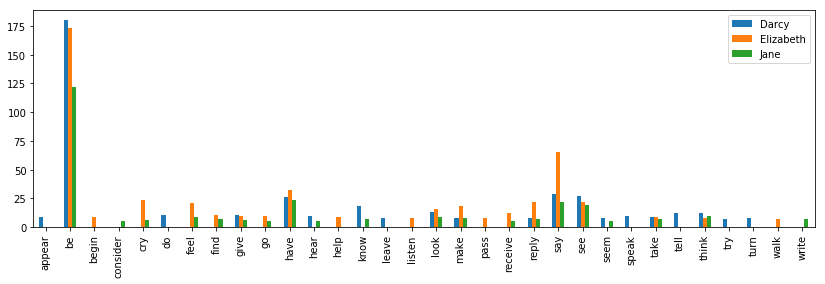

In [64]:
def verbsToMatrix(verbCounts): 
    """ 
    Takes verb counts given by verbsForCharacters 
    and makes Pandas Series out of them, suitabe for combination in 
    a DataFrame. 
    """
    return pd.Series({t[0]: t[1] for t in verbCounts})

verbsDF = pd.DataFrame({'Elizabeth': verbsToMatrix(elizabethVerbs), 
                        'Darcy': verbsToMatrix(darcyVerbs), 
                        'Jane': verbsToMatrix(janeVerbs)}).fillna(0)
verbsDF.plot(kind='bar', figsize=(14,4))

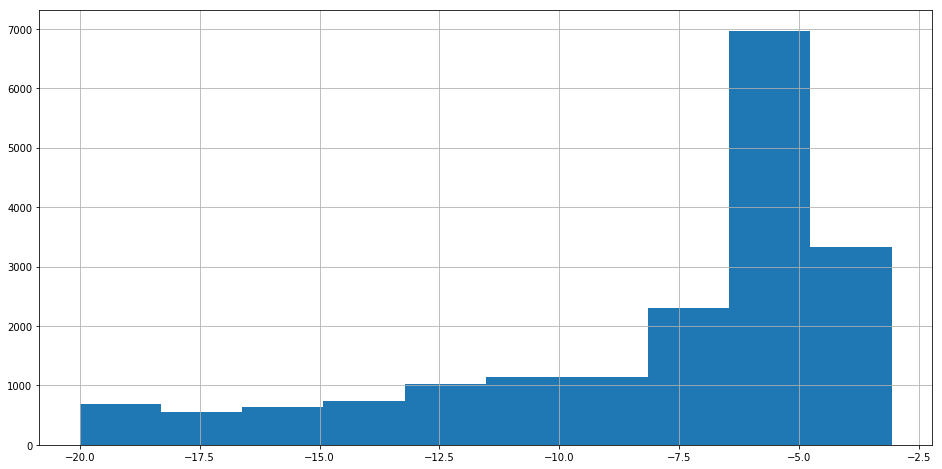

In [65]:
##Probabilities
#SpaCy has a list of probabilities for English words, and these probabilities are automatically associated with each word once we parse the document. 
#Let's see what the distribution is like:

probabilities = [word.prob for word in grail] 
pd.Series(probabilities).hist()

In [66]:
list(set([word.string.strip().lower() for word in grail if word.prob < -19]))[:20]

['hiyaah',
 'goodem',
 'approacheth',
 'zoosh',
 'angnor',
 'bors',
 'ehh--',
 'seen--',
 'donaeis',
 'rather--',
 'zoot',
 'ninepence',
 'our--',
 'galahad',
 'u--',
 'uh--',
 'merger--',
 'erbert',
 'where--',
 'camaaaaaargue']

In [67]:
#counting improbable words
Counter([word.string.strip().lower() 
         for word in grail 
         if word.prob < -19.5]).most_common(20)

[('bedevere', 61),
 ('head', 54),
 ('bridgekeeper', 18),
 ('zoot', 14),
 ('minstrel', 13),
 ('concorde', 12),
 ('rewr', 10),
 ('person', 8),
 ('crone', 7),
 ('aaaaugh', 7),
 ('a--', 5),
 ('twong', 4),
 ('aaaugh', 4),
 ("we're--", 4),
 ('number', 4),
 ('ninepence', 3),
 ('u--', 3),
 ('w--', 3),
 ('hiyya', 3),
 ('um--', 3)]

In [68]:
Counter([word.string.strip().lower() 
         for word in pride 
         if word.prob < -19.5 
         and word.is_alpha
         and word.pos_ != 'PROPN'] # This time, let's ignore proper nouns.
       ).most_common(20)

[('rosings', 26),
 ('gentlemanlike', 8),
 ('twelvemonth', 7),
 ('number', 5),
 ('quadrille', 4),
 ('mark', 4),
 ('repine', 4),
 ('parsonage', 4),
 ('discomposure', 3),
 ('regimentals', 3),
 ('suitableness', 3),
 ('overspread', 3),
 ('composedly', 3),
 ('fretfully', 2),
 ('archly', 2),
 ('unaffectedly', 2),
 ('panegyric', 2),
 ('precipitance', 2),
 ('prepossession', 2),
 ('discomposed', 2)]

In [69]:
##do this with ngrams
def ngrams(doc, n): 
    doc = [word for word in doc 
           if word.is_alpha # Get rid of punctuation
           if not word.string.isupper()] # Get rid of all-caps speaker headings
    return list(zip(*[doc[i:] for i in range(n)]))

In [70]:
grailGrams = set(ngrams(grail, 3))

In [71]:
for gram in grailGrams: 
    if sum([word.prob for word in gram]) < -40: 
        print(gram)

(boom, pweeng, boom)
(wom, Neee, wom)
(Pie, Iesu, domine)
(domine, Wayy, splash)
(fwump, Concorde, Concorde)
(Shh, Shh, Shh)
(clang, squeak, squeak)
(chanting, Pie, Iesu)
(domine, dona, eisrequiem)
(liege, trumpets, Camelot)
(Olfin, Bedwere, of)
(chanting, Pie, Iesu)
(Tim, Quite, pweeng)
(clank, scribble, scribble)
(trusty, servant, Patsy)
(dona, eisrequiem, How)
(Pie, Iesu, domine)
(Iesu, domine, dona)
(Wayy, twang, whispering)
(clop, clop, Ooh)
(rewr, rewr, rewr)
(bonk, dona, eis)
(uh, Launcelot, Galahad)
(haw, haw, Ha)
(Cherries, Mud, Churches)
(vache, mooo, If)
(English, k, nnniggets)
(wicked, wicked, Zoot)
(clop, clop, clop)
(Aaaugh, dramatic, chord)
(ecky, ecky, ecky)
(Charge, squeak, squeak)
(nnniggets, Thpppt, taunting)
(Ow, Ow, Agh)
(Hiyah, Aah, Aaah)
(then, twong, mooooooo)
(clop, clop, clop)
(squeak, squeak, Aaaaugh)
(clop, clop, Halt)
(bois, Quoi, Un)
(number, thou, shalt)
(Hyy, Hya, Hiyya)
(de, bois, Quoi)
(Iesu, domine, dona)
(Pie, Iesu, domine)
(Shh, Shh, Shh)
(bonk, Pie

(anarcho, syndicalist, commune)
(Thsss, boom, Ayy)
(quack, quack, quack)
(Splendid, Aah, boom)
(Aaaaaaaaah, woosh, kills)
(of, Olfin, Bedwere)
(domine, donaeis, requiem)


In [72]:
#word embeddings (word vectors)
coconut, africanSwallow, europeanSwallow, horse = nlp('coconut'), nlp('African Swallow'), nlp('European Swallow'), nlp('horse')

In [73]:
coconut.similarity(horse)

0.15660883152130853

In [74]:
prideNouns = [word for word in pride if word.pos_.startswith('N')][:150]

In [75]:
prideNounVecs = [word.vector for word in prideNouns]
prideNounLabels = [word.string.strip() for word in prideNouns]

In [76]:
prideNounVecs[0].shape

(300,)

A single vector is 300-dimensional, so in order to plot it in 2D, it might help to reduce the dimensionality to the most meaningful dimensions. We can use Scikit-Learn to perform truncated singular value decomposition for latent semantic analysis (LSA).

In [77]:
lsa = TruncatedSVD(n_components=2)
lsaOut = lsa.fit_transform(prideNounVecs)

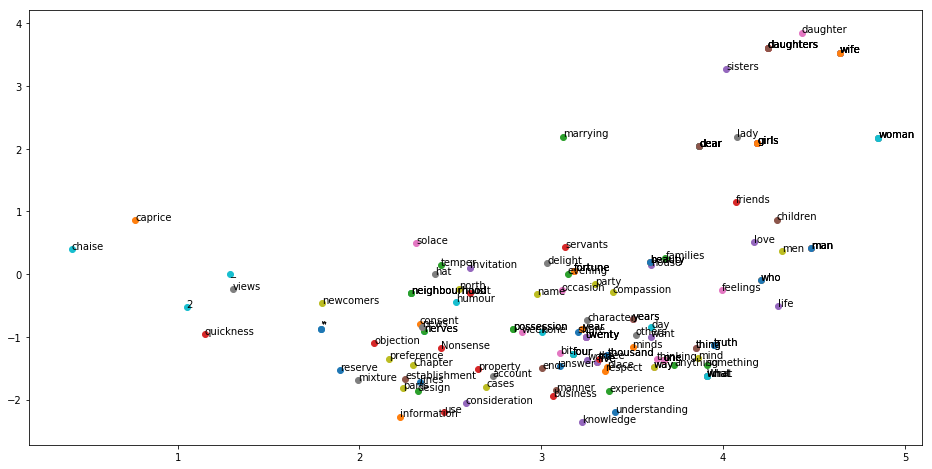

In [78]:
xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(prideNounLabels[i], (xs[i], ys[i]))

## Document Vectorization
This uses a non-semantic technique for vectorizing documents, just using bag-of-words. We won't need any of the fancy features of SpaCy for this, just scikit-learn. We'll use a subset of the Inaugural Address Corpus that contains 20th and 21st century inaugural addresses.
First, we'll vectorize the corpus using scikit-learn's TfidfVectorizer class. This creates a matrix of word frequencies. (It doesn't actually use TF-IDF, since we're turning that off in the options below.)


In [79]:
tfidf = TfidfVectorizer(input='filename', decode_error='ignore', use_idf=False)

In [80]:
inauguralFilenames = sorted(glob('inaugural/*'))

# Make labels by removing the directory name and .txt extension: 
labels = [filename.split('/')[1] for filename in inauguralFilenames]
labels = [filename.split('.')[0] for filename in labels]

# While we're at it, let's make a list of the lengths, so we can use them to plot dot sizes. 
lengths = [len(open(filename, errors='ignore').read())/100 for filename in inauguralFilenames]

# Add a manually compiled list of presidential party affiliations, 
# So that we can use this to color our dots. 
parties = 'rrrbbrrrbbbbbrrbbrrbrrrbbrrbr'

In [81]:
tfidfOut = tfidf.fit_transform(inauguralFilenames)

In [82]:
tfidfOut.shape

(29, 6177)

In [83]:
lsaOut = lsa.fit_transform(tfidfOut.todense())

xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i], c=parties[i], s=lengths[i], alpha=0.5)
    plt.annotate(labels[i], (xs[i], ys[i]))

In [85]:
## Average Sentence Lengths
inaugural = [nlp(open(doc, errors='ignore').read()) for doc in inauguralFilenames]


In [86]:
sentLengths = [ np.mean([len(sent) for sent in doc.sents]) for doc in inaugural ]

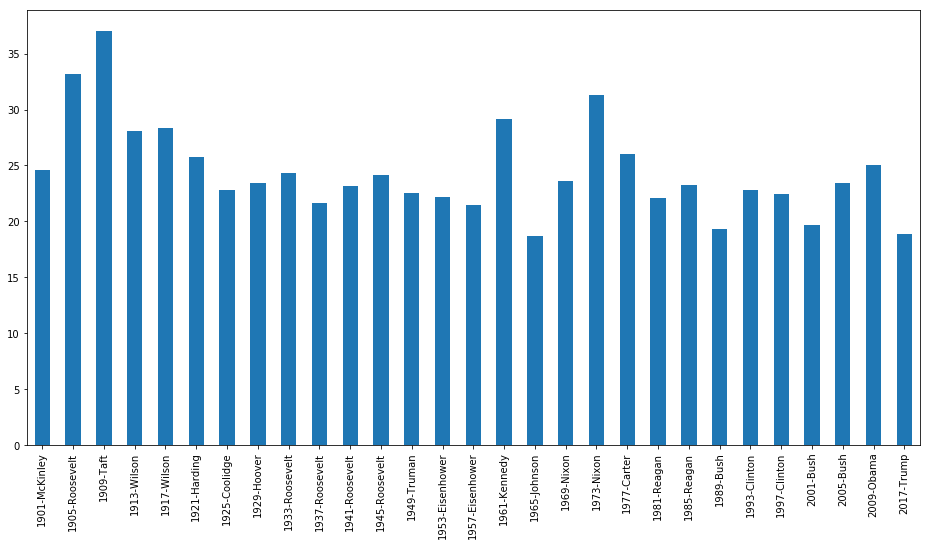

In [87]:
pd.Series(sentLengths, index=labels).plot(kind='bar')

## Term Frequency distributions
We're simply going to count the occurrences of words and divide by the total number of words in the document.

In [88]:
# Create a Pandas Data Frame with each word counted in each document, 
# divided by the length of the document. 
inauguralSeries = [pd.Series(Counter(   
                    [word.string.strip().lower() 
                     for word in doc]))/len(doc) 
                     for doc in inaugural]
seriesDict = {label: series for label, series in zip(labels, inauguralSeries)}
inauguralDf = pd.DataFrame(seriesDict).T.fillna(0)

In [89]:
inauguralDf.head()

,,!,"""",$,','ll,'s,'ve,(,),...,yields,you,young,youngest,your,yours,yourselfxand,yourselves,youth,zealously
1901-McKinley,0.004872,0.000406,0.004872,0.000406,0.0,0.0,0.000406,0.0,0.0,0.0,...,0.0,0.000406,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1905-Roosevelt,0.003656,0.000000,0.000000,0.000000,0.0,0.0,0.000914,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1909-Taft,0.007303,0.000000,0.000679,0.000170,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1913-Wilson,0.005753,0.000523,0.001046,0.000000,0.0,0.0,0.002615,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1917-Wilson,0.010161,0.000000,0.000000,0.000000,0.0,0.0,0.001195,0.0,0.0,0.0,...,0.0,0.001195,0.0,0.0,0.003586,0.0,0.0,0.0,0.0,0.0


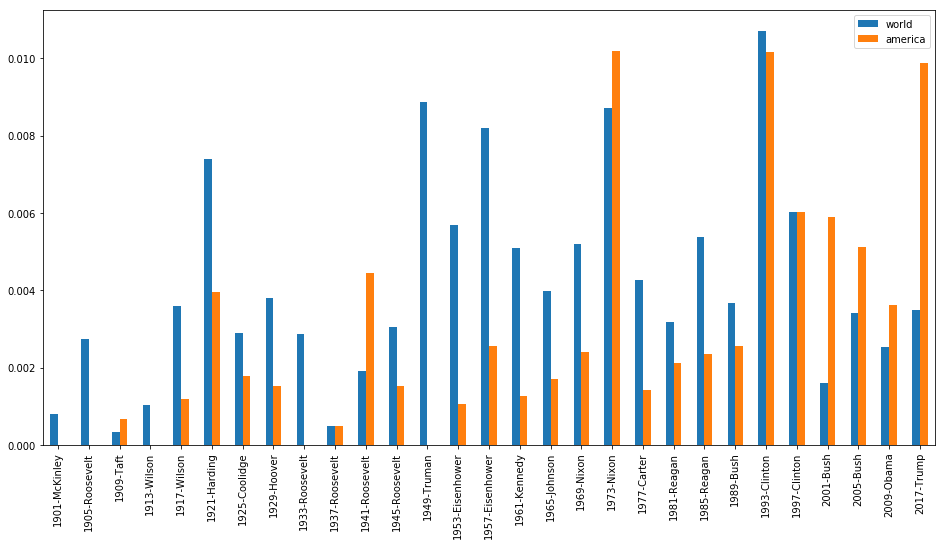

In [90]:
inauguralDf[['world', 'america']].plot(kind='bar')